In this notebook, I compare the results of linmix with ODR and roxy. 

For the comparison, I can only use detections. 

In [1]:
import sys
import pandas as pd
import numpy as np
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from linreg import *

from roxy.regressor import RoxyRegressor
import roxy.plotting

import scipy.odr as odr
import numdifftools as nd

c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\justi\AppData\Local\Temp\ipykernel_70552\1856919014.py:11: DeprecationWarning: `scipy.odr` is deprecated as of version 1.17.0 and will be removed in SciPy 1.19.0. Please use `https://pypi.org/project/odrpack/` instead.
  import scipy.odr as odr


In [2]:
import matplotlib as mpl
mpl.rcParams["text.usetex"] = False

---

# Get Only BH Detections

In [7]:
lr0, lx0, lr, dlr, delta_radio, lx, dlx_l, dlx_u, delta_xrays, source_names, unique_names, unique_D, unique_D_prob= get_data_arrays(names = None, interp=True, rerun = False, save=False, incl_Fr_uplims=False, type_source="BH")
delta = delta_radio.astype(int) # Convert boolean to int (1 for detection, 0 for upper limit)


# x:
lx_scaled = lx/lx0
log_lx_scaled = np.log10(lx_scaled) # x
log_dlx_l_scaled = np.log10(lx / (lx - dlx_l)) # = log(lx/lx0) - log( (lx - dlx_l)/ lx0 ) 
log_dlx_u_scaled = np.log10( ( lx + dlx_u) / lx ) # = log( (lx + dlx_u)/ lx0 ) - log(lx/lx0)
log_dlx_scaled = np.maximum(log_dlx_l_scaled , log_dlx_u_scaled )

# y:
lr_scaled = lr/lr0
log_lr_scaled = np.log10(lr_scaled) # y
log_dlr_l_scaled = np.log10(lr / (lr - dlr))
log_dlr_u_scaled = np.log10( ( lr + dlr) / lr )
log_dlr_scaled = np.maximum(log_dlr_l_scaled , log_dlr_u_scaled )

x = log_lx_scaled
y = log_lr_scaled
dx = log_dlx_scaled
dy = log_dlr_scaled


lr0:  4.54e+28
lx0:  5.47e+35

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']
Sources included after filtering:  ['4U 1543-47' '4U 1630-47' 'EXO 1846-031' 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630' 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1810-222' 'MAXI J1820+070'
 'Swift J1727.8-1613' 'Swift J1842.5-1124']
Number of source: 14


# linmix with Only Detections -- BHs

In [4]:
## Make directory to store MCMC results
dir = "./MCMC_parfiles_interp" + "_BH" + "_no_Fr_uplims" + f"_Nruns_1"
print("DIRECTORY: ", dir)
if os.path.exists(dir):
    shutil.rmtree(dir)  # delete the directory and its contents
os.makedirs(dir) 
run_mcmc_iteration(j=0, x=x, y=y, dx=dx, dy=dy, delta=delta, K=3, dir=dir, seed=5, silence=True, xycov=None,  min_iter=5000)

DIRECTORY:  ./MCMC_parfiles_interp_BH_no_Fr_uplims_Nruns_1


DIRECTORY:  ./MCMC_parfiles_interp_BH_no_Fr_uplims_Nruns_1
lr0:  4.54e+28
lx0:  5.47e+35

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']
Sources included after filtering:  ['4U 1543-47' '4U 1630-47' 'EXO 1846-031' 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630' 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1810-222' 'MAXI J1820+070'
 'Swift J1727.8-1613' 'Swift J1842.5-1124']
Number of source: 14
(10000,) (10000,) (10000,)

USING ALL RESULTS TOGETHER:
The fitted values and uncertainties based on the mean, 16th, and 84th percentile of all values
Alpha = 0.197  -0.03

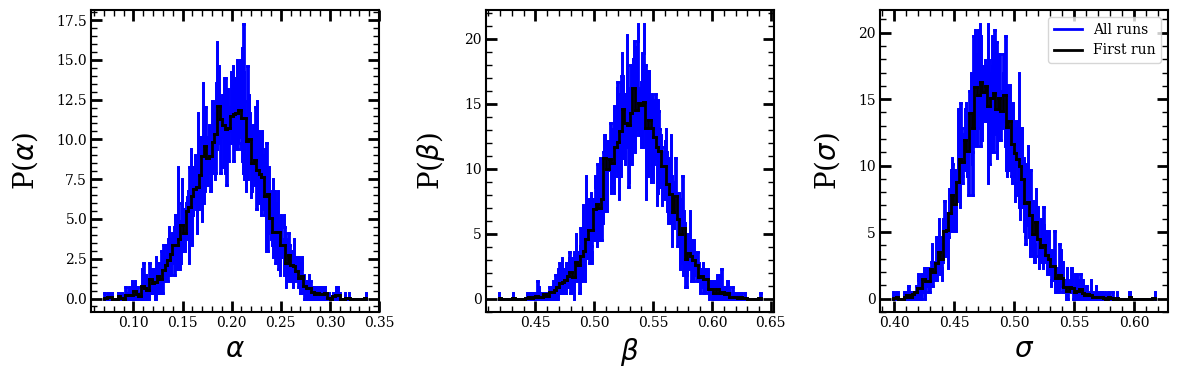

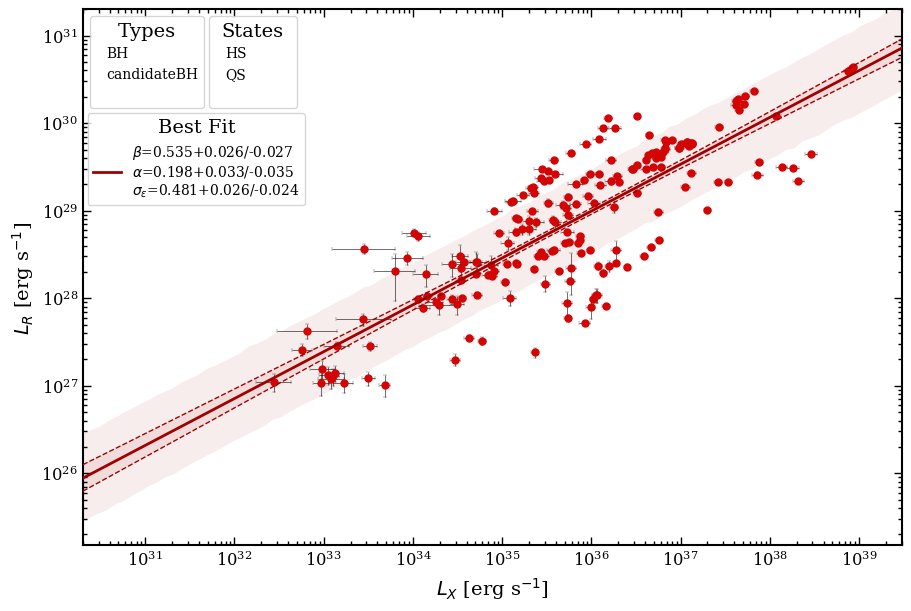

In [3]:
linmix_results(N_runs =1, names = None, type_source= "BH", interp=True, include_Fr_uplims=False)

---

# ROXY

In [4]:
def my_fun(x, theta):
    return theta[0] * x + theta[1]

param_names = ['A', 'B']
theta0 = [2, 0.5]
param_prior = {'A':[0, 5], 'B':[-2, 2], 'sig':[0, 3.0]}

reg = RoxyRegressor(my_fun, param_names, theta0, param_prior)

In [8]:
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, x, y, [dx, dy], nwarm, nsamp, method='mnr')


Optimisation Results:
A:	0.5361465811729431
B:	0.19738899171352386
sig:	0.474480539560318
mu_gauss:	0.041419073939323425
w_gauss:	1.3105322122573853

Running MCMC


sample: 100%|██████████| 5700/5700 [00:04<00:00, 1391.30it/s, 7 steps of size 7.84e-01. acc. prob=0.91]



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         A      0.54      0.03      0.54      0.48      0.59   6882.52      1.00
         B      0.20      0.03      0.20      0.13      0.27   6129.19      1.00
  mu_gauss      0.04      0.09      0.04     -0.14      0.23   6057.94      1.00
       sig      0.48      0.03      0.48      0.43      0.53   6475.25      1.00
   w_gauss      1.32      0.07      1.32      1.19      1.45   6866.05      1.00

Number of divergences: 0


In [9]:
A_median = np.median(samples["A"])
print("A: ", A_median)
B_median = np.median(samples["B"])
print("B: ", B_median)
sig_median = np.median(samples["sig"])
print("si: ", sig_median)

A:  0.53561914
B:  0.19726539
si:  0.4793809


We see that the results are indeed very similar to the ones from linmix. 

In [10]:
# With 3 Gaussians
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, x, y, [dx, dy], nwarm, nsamp, method='gmm', ngauss=3, gmm_prior='hierarchical')


Optimisation Results:
A:	1.7574726343154907
B:	0.10420443117618561
sig:	1.7578394412994385
mu_gauss_0:	-1.6115721464157104
mu_gauss_1:	-0.22570672631263733
mu_gauss_2:	0.9322826266288757
w_gauss_0:	0.7721627950668335
w_gauss_1:	0.9890832304954529
w_gauss_2:	0.94780433177948
weight_gauss_0:	0.19646187126636505
weight_gauss_1:	0.4928707182407379
hyper_mu:	-1.3111950159072876
hyper_u2:	1.3475391864776611
hyper_w2:	0.21161410212516785

Running MCMC


sample: 100%|██████████| 5700/5700 [00:15<00:00, 363.33it/s, 63 steps of size 9.66e-02. acc. prob=0.80] 



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      0.54      0.03      0.54      0.48      0.59   1841.45      1.00
          B      0.20      0.04      0.20      0.13      0.27    125.73      1.01
   hyper_mu      0.21      1.25      0.13     -1.63      1.99    241.84      1.00
   hyper_u2      4.08     22.95      1.00      0.01     12.91    474.27      1.00
   hyper_w2      1.68      1.40      1.27      0.04      4.43    325.01      1.00
mu_gauss[0]     -0.69      0.74     -0.43     -2.52      0.12     19.03      1.07
mu_gauss[1]      0.03      0.34      0.04     -0.63      0.72    210.09      1.01
mu_gauss[2]      0.63      1.12      0.42     -0.10      1.72    636.99      1.01
        sig      0.48      0.03      0.48      0.43      0.53    212.79      1.01
 w_gauss[0]      1.26      0.56      1.26      0.32      2.01    191.65      1.01
 w_gauss[1]      1.25      0.53      1.26      0.33      2.01    238.73      1.00
 w_gauss[2]    

C:\Users\justi\AppData\Local\Temp\ipykernel_36304\168268688.py:3: Warning: Fewer than 100 effective samples for parameters: mu_gauss, weights
  samples = reg.mcmc(param_names, x, y, [dx, dy], nwarm, nsamp, method='gmm', ngauss=3, gmm_prior='hierarchical')


In [11]:
A_median = np.median(samples["A"])
print("A: ", A_median)
B_median = np.median(samples["B"])
print("B: ", B_median)
sig_median = np.median(samples["sig"])
print("si: ", sig_median)

A:  0.53561985
B:  0.20199478
si:  0.47765544


In [12]:
# With 4 Gaussians
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, x, y, [dx, dy], nwarm, nsamp, method='gmm', ngauss=4, gmm_prior='hierarchical')


Optimisation Results:
A:	0.9449883103370667
B:	0.9161807298660278
sig:	1.8204814195632935
mu_gauss_0:	-1.6748558282852173
mu_gauss_1:	-0.4384797513484955
mu_gauss_2:	0.3838376998901367
mu_gauss_3:	1.3082799911499023
w_gauss_0:	0.7602302432060242
w_gauss_1:	1.1776132583618164
w_gauss_2:	1.1127769947052002
w_gauss_3:	0.8308714032173157
weight_gauss_0:	0.16857394576072693
weight_gauss_1:	0.45727819204330444
weight_gauss_2:	0.3571440279483795
hyper_mu:	-0.09518254548311234
hyper_u2:	4.552392959594727
hyper_w2:	0.26140114665031433

Running MCMC


sample: 100%|██████████| 5700/5700 [00:15<00:00, 377.55it/s, 63 steps of size 9.24e-02. acc. prob=0.84] 



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      0.54      0.03      0.53      0.48      0.59   2921.02      1.00
          B      0.20      0.04      0.20      0.13      0.27   1964.57      1.00
   hyper_mu      0.03      0.65      0.05     -1.40      1.35    608.79      1.00
   hyper_u2      1.28      2.43      0.69      0.01      4.22   1492.09      1.00
   hyper_w2      1.33      1.17      1.02      0.01      3.33    893.82      1.00
mu_gauss[0]     -0.65      0.53     -0.50     -1.76      0.11    380.65      1.00
mu_gauss[1]     -0.13      0.34     -0.08     -0.90      0.51    953.81      1.00
mu_gauss[2]      0.24      0.34      0.21     -0.38      0.99   1399.66      1.00
mu_gauss[3]      0.76      0.63      0.62     -0.04      1.88   1620.44      1.00
        sig      0.48      0.03      0.48      0.43      0.53   3209.64      1.00
 w_gauss[0]      1.30      0.59      1.27      0.32      2.14    860.44      1.00
 w_gauss[1]    

In [13]:
A_median = np.median(samples["A"])
print("A: ", A_median)
B_median = np.median(samples["B"])
print("B: ", B_median)
sig_median = np.median(samples["sig"])
print("si: ", sig_median)

A:  0.5345906
B:  0.19890964
si:  0.47868162


We see that the results are still very similar. 

---

# ODR Comparison
Note that we cannot include an additional scatter term as this would be degenerate with the intercept value.
>> So we expect the result to be different. 

Fitted parameters:
  Slope = 0.721 ± 0.036
  Intercept = 0.133 ± 0.040


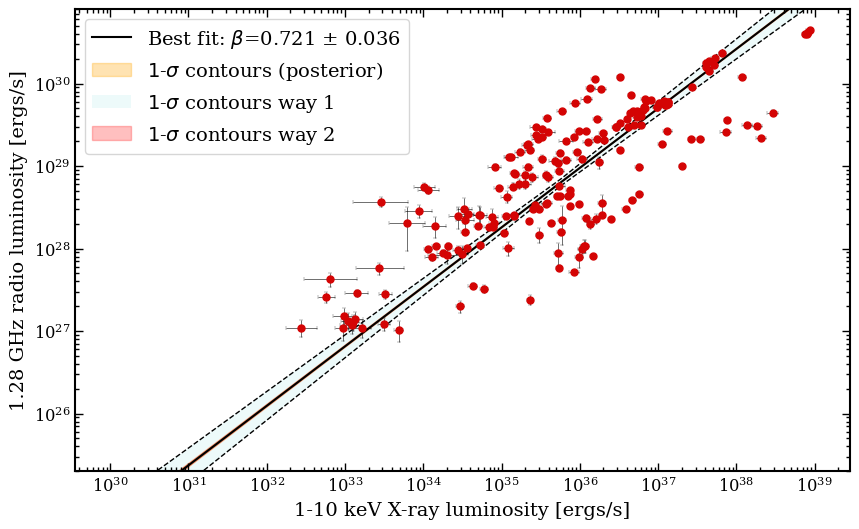

In [10]:
# Adapted from: https://stackoverflow.com/questions/79028892/how-to-get-errors-on-a-cubic-spline-interpolation-python-splrep-splev
def variance(model, x, p, Cp):
    """
    Calculate the variance of the model predictions based on the covariance matrix of the parameters.

    Parameters:
    - model: The model function.
    - x: The independent variable values.
    - p: The best-fit parameters (array).
    - Cp: The covariance matrix of the parameters.

    Returns:
    - Stanard dev of the model predictions.
    """
    def proxy(q):
        return model(q, x)  # Pass parameters as the first argument

    def projection(J):
        return J @ Cp @ J.T

    # Compute the Jacobian of the model with respect to the parameters
    Jp = nd.Jacobian(proxy)(p)

    # Compute the variance
    Cy = np.apply_along_axis(projection, 1, Jp)

    # Return square root to get sigma
    return Cy ** 0.5


###############

# Define the linear model for ODR
def linear_func(beta, x):
    return beta[0] * x + beta[1]

# Create a model object
model = odr.Model(linear_func)

# Create a data object with errors
data = odr.RealData(x, y, sx=dx, sy= dy)

# Set up the ODR with an initial guess
odr_instance = odr.ODR(data, model, beta0=[1.0, 0.0])

# Run the regression
output = odr_instance.run()

# Get the fitted parameters
slope, intercept = output.beta
slope_err, intercept_err = output.sd_beta
print(f"Fitted parameters:")
print(f"  Slope = {slope:.3f} ± {slope_err:.3f}")
print(f"  Intercept = {intercept:.3f} ± {intercept_err:.3f}")

# Set up the figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

# Plot the data
colour = "#D40404"
plot, caps, bars = ax.errorbar(lx, lr, yerr=dlr, xerr=[dlx_l, dlx_u], fmt='o', ms=5, mec=colour, mfc=colour, uplims=~delta_radio,  xuplims=~delta_xrays, capsize=0.5, ecolor="black", elinewidth=0.4, zorder=3)
for cap in caps:
    cap.set_color('black')      # Set cap color
    cap.set_markeredgewidth(0.2)  # Set edge width
    cap.set_markersize(3) 
for bar in bars:
    bar.set_color('black')

# Plot the results on normal scale 
x_plot = 10**np.linspace(30,39,1000,endpoint=True) 
y_fit = lr0 * ((x_plot/lx0)**(slope)) * (10**(intercept))
"""
y_fit above is equivalent to: 
lr0*10**(linear_func(output.beta, np.log10(x_plot / lx0))) 
= lr0*10**(slope * np.log10(x_plot / lx0) + intercept)
= lr0 * 10**intercept * 10**[slope * np.log10(x_plot / lx0)]
= lr0 * 10**intercept * [10**(np.log10(x_plot / lx0))]**slope
= lr0 * 10**intercept * (x_plot/lx0)**slope
"""
ax.plot(x_plot, y_fit, color='black', label=r'Best fit: $\beta$' +f'={slope:.3f} ± {slope_err:.3f}')



# Draw 1000 samples from the ODR covariance 
odr_mean = output.beta
odr_cov = output.cov_beta
odr_samples = np.random.multivariate_normal(odr_mean, odr_cov, size=1000)
results = []
for ms, bs in odr_samples:
    #plt.plot(x_plot, lr0*10**(ms * np.log10(x_plot/lx0) + bs), color='blue', alpha=0.10, linewidth=1)
    res = lr0*10**(ms * np.log10(x_plot/lx0) + bs)
    results.append(res)
y_lower = np.percentile(results, 16, axis=0)
y_upper = np.percentile(results, 84, axis=0)
ax.fill_between(x_plot, y_lower, y_upper, color='orange', alpha=0.3, label=r'$1$-$\sigma$ contours (posterior)')



# For 1-sigma region -- way 1
# Assumes independent errors in slope and intercept. 
case1 = lr0 * ((x_plot/lx0)**(slope-slope_err)) * (10**(intercept + intercept_err))
case2 = lr0 * ((x_plot/lx0)**(slope+slope_err)) * (10**(intercept - intercept_err))
case3 = lr0 * ((x_plot/lx0)**(slope-slope_err)) * (10**(intercept - intercept_err))
case4 = lr0 * ((x_plot/lx0)**(slope+slope_err)) * (10**(intercept + intercept_err))
maxline = []
minline = []
for i in range(len(case1)):
    maxline.append(max(case1[i], case2[i], case3[i], case4[i]))
    minline.append(min(case1[i], case2[i], case3[i], case4[i]))
ax.fill_between(x_plot, minline, maxline, facecolor='c', alpha=0.07, label=r'$1$-$\sigma$ contours way 1')
newfitrange = ax.errorbar(x_plot, minline, fmt='k--', lw=1)
ax.plot(x_plot, maxline, 'k--', lw=1)


# For 1-sigma region -- way 2
x_plot_transf = np.log10(x_plot / lx0)
ax.fill_between(
    x_plot,
    lr0*10**(linear_func(output.beta, x_plot_transf) - variance(linear_func,x_plot_transf, output.beta, output.cov_beta)),
    lr0*10**(linear_func(output.beta, x_plot_transf) + variance(linear_func,x_plot_transf, output.beta, output.cov_beta)),
    alpha=0.25,
    color="r",
    label=r"$1$-$\sigma$ contours way 2",
)

ax.legend()
ax.set_ylim([2e25,8e30])
#ax.set_xlim([1e31,1.1e31])
#ax.set_ylim([7e24,3e25])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("1-10 keV X-ray luminosity [ergs/s]")
ax.set_ylabel("1.28 GHz radio luminosity [ergs/s]")
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=10))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs="auto", numticks=10))
plt.show()

We see that the slope is a lot steeper if we do not include a scatter term. 